### Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
df = pd.read_csv('ssense_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   brand        19919 non-null  object
 1   description  19919 non-null  object
 2   price_usd    19919 non-null  int64 
 3   type         19919 non-null  object
dtypes: int64(1), object(3)
memory usage: 622.6+ KB


### Data Visualization and Preprocessing

In [4]:
df.head()

,brand,description,price_usd,type
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens


In [5]:
df.tail()

,brand,description,price_usd,type
19914,by Malene Birger,Black Micella Boots,497,womens
19915,See by Chloé,Black July Boots,331,womens
19916,OPEN YY,Black Treaded Shearling Boots,426,womens
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens
19918,Coperni,Black Lacing Origami Heels,621,womens


In [6]:
df['price_usd'].max()

13000

In [7]:
df['price_usd'].min()

20

<Axes: xlabel='price_usd', ylabel='Count'>

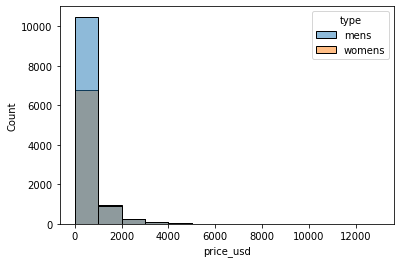

In [8]:
sns.histplot(
    df,
    x = 'price_usd',
    bins = [
        0, 1000,2000, 3000,
        4000, 5000, 6000, 7000,
        8000, 9000, 10000, 13000
    ],
    hue = 'type'
)

In [9]:
from sklearn import preprocessing

In [10]:
le = preprocessing.LabelEncoder()
df['brand_enc'] = le.fit_transform(df['brand'])
df

,brand,description,price_usd,type,brand_enc
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,454
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,454
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,454
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,454
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,454
...,...,...,...,...,...
19914,by Malene Birger,Black Micella Boots,497,womens,610
19915,See by Chloé,Black July Boots,331,womens,487
19916,OPEN YY,Black Treaded Shearling Boots,426,womens,388
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens,388


In [11]:
df['type'].unique()

array(['mens', 'womens'], dtype=object)

In [12]:
gender_dummies = pd.get_dummies(df['type'], drop_first = True)
gender_dummies

,womens
0,0
1,0
2,0
3,0
4,0
...,...
19914,1
19915,1
19916,1
19917,1


In [13]:
df = pd.concat([df, gender_dummies], axis = 1)
df

,brand,description,price_usd,type,brand_enc,womens
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,454,0
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,454,0
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,454,0
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,454,0
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,454,0
...,...,...,...,...,...,...
19914,by Malene Birger,Black Micella Boots,497,womens,610,1
19915,See by Chloé,Black July Boots,331,womens,487,1
19916,OPEN YY,Black Treaded Shearling Boots,426,womens,388,1
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens,388,1


In [14]:
df['length'] = df['description'].apply(lambda x: len(x))
df

,brand,description,price_usd,type,brand_enc,womens,length
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,454,0,31
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,454,0,40
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,454,0,42
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,454,0,39
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,454,0,50
...,...,...,...,...,...,...,...
19914,by Malene Birger,Black Micella Boots,497,womens,610,1,19
19915,See by Chloé,Black July Boots,331,womens,487,1,16
19916,OPEN YY,Black Treaded Shearling Boots,426,womens,388,1,29
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens,388,1,29


In [15]:
df['length'].max()

77

In [16]:
df['length'].min()

10

In [17]:
import string
from nltk.corpus import stopwords

In [18]:
stopword_arr = stopwords.words('english')
stopword_arr

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
punctuations = string.punctuation
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def desc_to_list_cleanup(text):
    text = ''.join([ch for ch in text if ch not in punctuations])
    word_arr = text.split()
    word_arr = [word.lower() for word in word_arr if word.lower() not in stopword_arr]
    return word_arr

In [21]:
df['description'].head(10).apply(desc_to_list_cleanup)

0                      [black, moncler, edition, coat]
1            [black, moncler, edition, cyclopic, coat]
2          [black, moncler, edition, cyclopic, jacket]
3               [taupe, green, moncler, edition, coat]
4    [taupe, green, moncler, edition, cyclopic, jac...
5          [taupe, moncler, edition, cyclopic, jacket]
6          [taupe, moncler, edition, radiance, jacket]
7               [taupe, green, moncler, edition, vest]
8          [black, moncler, edition, radiance, jacket]
9    [taupe, green, moncler, edition, subhuman, swe...
Name: description, dtype: object

In [22]:
df['word_count'] = df['description'].apply(lambda x: len(desc_to_list_cleanup(x)))
df

,brand,description,price_usd,type,brand_enc,womens,length,word_count
0,Rick Owens,Black Moncler Edition Down Coat,2585,mens,454,0,31,4
1,Rick Owens,Black Moncler Edition Cyclopic Down Coat,2405,mens,454,0,40,5
2,Rick Owens,Black Moncler Edition Cyclopic Down Jacket,3160,mens,454,0,42,5
3,Rick Owens,Taupe & Green Moncler Edition Down Coat,3505,mens,454,0,39,5
4,Rick Owens,Taupe & Green Moncler Edition Cyclopic Down Ja...,2885,mens,454,0,50,6
...,...,...,...,...,...,...,...,...
19914,by Malene Birger,Black Micella Boots,497,womens,610,1,19,3
19915,See by Chloé,Black July Boots,331,womens,487,1,16,3
19916,OPEN YY,Black Treaded Shearling Boots,426,womens,388,1,29,4
19917,OPEN YY,Beige Treaded Shearling Boots,433,womens,388,1,29,4


In [23]:
df['word_count'].max()

10

In [24]:
df[df['word_count'] == df['word_count'].max()]

,brand,description,price_usd,type,brand_enc,womens,length,word_count
258,KANGHYUK,White & Red Reebok Classics Edition DMX Run 6 ...,168,mens,271,0,61,10
638,KANGHYUK,Black & Red Reebok Classics Edition DMX Run 6 ...,162,mens,271,0,61,10
2530,Jacquemus,Red Guirlande 'Le T-Shirt Brilho Manches Longu...,315,mens,258,0,69,10
2531,Jacquemus,Green Guirlande 'Le T-Shirt Brilho Manches Lon...,315,mens,258,0,71,10
2736,Merrell 1TRL,Navy White Mountaineering Edition Moab 3 Smoot...,405,mens,347,0,61,10
2838,Moncler Genius,Moncler x Palm Angels Yellow & Navy Striped Lo...,605,mens,354,0,60,10
3956,Jacquemus,Black Le Chouchou 'La veste de Nîmes Criollo' ...,488,mens,258,0,58,10
6212,Rick Owens,SSENSE Exclusive Black KEMBRA PFAHLER Edition ...,1900,mens,454,0,77,10
8067,Moncler Genius,Moncler x adidas Originals Reversible Blue & B...,380,mens,354,0,66,10
8800,CAYL,Gray New Balance Edition Fresh Foam X More Tra...,160,mens,91,0,60,10


In [25]:
df['word_count'].min()

2

In [26]:
df[df['word_count'] == df['word_count'].min()]

,brand,description,price_usd,type,brand_enc,womens,length,word_count
5811,Our Legacy,Black Haven Jacket,440,mens,401,0,18,2
6771,Who Decides War,Black All Over Jeans,800,mens,583,0,20,2
6854,Moncler,Green Ain Down Jacket,1750,mens,353,0,21,2
6855,Moncler,Yellow Ain Down Jacket,1750,mens,353,0,22,2
7015,Drake's,Red 'D' Cap,62,mens,157,0,11,2
7016,Drake's,Brown 'D' Cap,59,mens,157,0,13,2
8054,Gramicci,Black Down Scarf,48,mens,215,0,16,2
8944,AMIRI,Gray MA Sweater,655,mens,25,0,15,2
8948,AMIRI,Gray MA Beanie,324,mens,25,0,14,2
8949,AMIRI,Red MA Cap,330,mens,25,0,10,2


In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [28]:
bow_t = CountVectorizer(analyzer = desc_to_list_cleanup).fit(df['description'])

In [29]:
text_bow = bow_t.transform(df['description'])

In [30]:
tfdif_t = TfidfTransformer().fit_transform(text_bow)

In [31]:
df_bow = pd.DataFrame(tfdif_t.toarray(), columns = bow_t.vocabulary_.keys())
df_bow

,black,moncler,edition,coat,cyclopic,jacket,taupe,green,radiance,vest,...,lalex,justine,alizze,ryder,treaded,thessaly,65,nari,youth,micella
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19917,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
for column in df_bow.columns:
    if df_bow.iloc[0][column] != 0:
        print(column)

figura
privacy
lined
sherpa


In [33]:
df.drop(['brand', 'description', 'type'], axis = 1, inplace = True)
df

,price_usd,brand_enc,womens,length,word_count
0,2585,454,0,31,4
1,2405,454,0,40,5
2,3160,454,0,42,5
3,3505,454,0,39,5
4,2885,454,0,50,6
...,...,...,...,...,...
19914,497,610,1,19,3
19915,331,487,1,16,3
19916,426,388,1,29,4
19917,433,388,1,29,4


In [34]:
df.corr()

,price_usd,brand_enc,womens,length,word_count
price_usd,1.000000,-0.025546,0.099231,0.043953,0.036494
brand_enc,-0.025546,1.000000,0.002276,0.033979,0.021503
womens,0.099231,0.002276,1.000000,0.053658,0.092988
length,0.043953,0.033979,0.053658,1.000000,0.849652
word_count,0.036494,0.021503,0.092988,0.849652,1.000000


<Axes: >

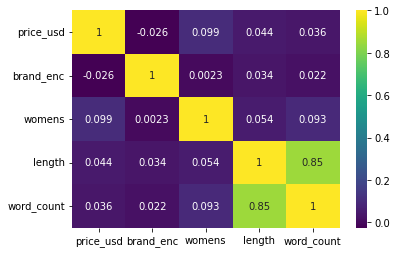

In [35]:
sns.heatmap(df.corr(), cmap = 'viridis', annot = True)

In [36]:
scaler = preprocessing.MinMaxScaler()

In [37]:
scaled_minmax = scaler.fit_transform(df.drop('price_usd', axis = 1))
scaled_minmax

array([[0.72063492, 0.        , 0.31343284, 0.25      ],
       [0.72063492, 0.        , 0.44776119, 0.375     ],
       [0.72063492, 0.        , 0.47761194, 0.375     ],
       ...,
       [0.61587302, 1.        , 0.28358209, 0.25      ],
       [0.61587302, 1.        , 0.28358209, 0.25      ],
       [0.20793651, 1.        , 0.23880597, 0.25      ]])

In [38]:
df.drop('price_usd', axis = 1).columns

Index(['brand_enc', 'womens', 'length', 'word_count'], dtype='object')

In [39]:
df_minmax = pd.DataFrame(scaled_minmax, columns = df.drop('price_usd', axis = 1).columns)
df_minmax

,brand_enc,womens,length,word_count
0,0.720635,0.0,0.313433,0.250
1,0.720635,0.0,0.447761,0.375
2,0.720635,0.0,0.477612,0.375
3,0.720635,0.0,0.432836,0.375
4,0.720635,0.0,0.597015,0.500
...,...,...,...,...
19914,0.968254,1.0,0.134328,0.125
19915,0.773016,1.0,0.089552,0.125
19916,0.615873,1.0,0.283582,0.250
19917,0.615873,1.0,0.283582,0.250


### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = pd.concat([df_minmax, df_bow], axis = 1)
y = df['price_usd']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

### Training and Evaluation

In [43]:
from sklearn import metrics

In [44]:
def train_evaluate(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    
    print(f'Coefficient: {model.coef_}')
    print(f'Intercept: {model.intercept_}')
    print(f'Train Score: {model.score(X_train, y_train)}')
    print(f'Test Score: {model.score(X_test, y_test)}')
    
    predictions = model.predict(X_test)
    
    sns.scatterplot(x = y_test, y = predictions)
    
    print(f'MAE: {metrics.mean_absolute_error(y_test, predictions)}')
    print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')
    print(f'Explained Variance Score: {metrics.explained_variance_score(y_test, predictions)}')

In [51]:
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.svm import SVR

Coefficient: [-173.20743083   79.63444393 -579.00591937 ...  476.13500977  413.93360901
    0.        ]
Intercept: -339.05773407021684
Train Score: 0.6883969364580605
Test Score: -2.2360491056391537e+20
MAE: 1859577562463.4377
MSE: 1.074036034985248e+26
RMSE: 10363570981979.367
Explained Variance Score: -2.2359104404478345e+20


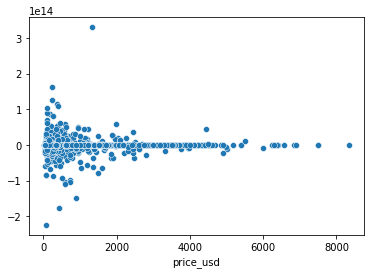

In [46]:
train_evaluate(X_train, X_test, y_train, y_test, LinearRegression())

Coefficient: [-107.70879882   83.1922492   622.68448079 ...  -73.50711264  -66.25752015
    0.        ]
Intercept: 399.3461859089696
Train Score: 0.587472174668466
Test Score: 0.4119380707813791
MAE: 302.9818786784866
MSE: 282462.3579110559
RMSE: 531.4718787584682
Explained Variance Score: 0.41200206792993255


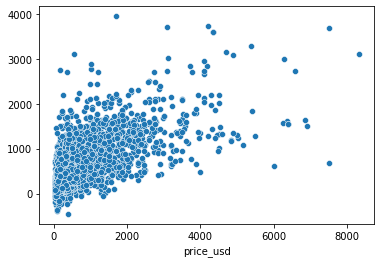

In [47]:
train_evaluate(X_train, X_test, y_train, y_test, BayesianRidge())

Coefficient: [[ 3.70261899e-01  1.65820420e-01 -1.52754563e-01 ... -2.21509413e-04
  -1.10227769e-04  0.00000000e+00]
 [-2.36141010e-01 -3.07588122e-01  5.64255715e-02 ... -9.30191409e-05
  -5.48216410e-05  0.00000000e+00]
 [-4.15056217e-01 -5.28752513e-01 -7.89610876e-02 ... -1.81811705e-04
  -1.07575000e-04  0.00000000e+00]
 ...
 [ 1.99424342e-01  8.32282715e-01  1.63949236e-02 ... -1.39702383e-04
  -8.27710999e-05  0.00000000e+00]
 [ 2.19321470e-01 -3.10099667e-01  1.12780010e-01 ... -1.19942173e-04
  -6.86136315e-05  0.00000000e+00]
 [-3.28756335e-01  4.97552822e-01  6.87253324e-02 ... -6.46297819e-05
  -3.92420495e-05  0.00000000e+00]]
Intercept: [-0.90673415 -1.22140728 -0.33281328 ... -1.21896161 -1.45912588
 -1.48231881]
Train Score: 0.22742594850462597
Test Score: 0.0784805890227577
MAE: 357.36044176706827
MSE: 527088.4394243641
RMSE: 726.0085670461225
Explained Variance Score: 0.06827324888771114


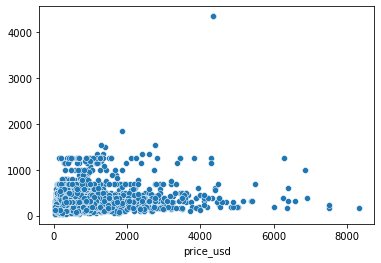

In [50]:
train_evaluate(X_train, X_test, y_train, y_test, LogisticRegression())